# 순환 신경망(Recurrent Neural Network, RNN)

### 케라스(Keras)로 RNN 구현하기

* RNN 층을 추가하는 코드.  
model.add(SimpleRNN(hidden_size)) # 가장 간단한 형태

* 추가 인자를 사용할 때  
model.add(SimpleRNN(hidden_size, input_shape=(timesteps, input_dim)))

* 다른 표기  
model.add(SimpleRNN(hidden_size, input_length=M, input_dim=N))  
단, M과 N은 정수

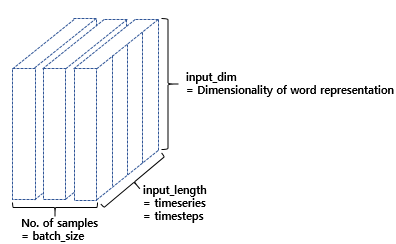

In [1]:
from keras.models import Sequential
from keras.layers import SimpleRNN

Using TensorFlow backend.


In [2]:
model = Sequential()
model.add(SimpleRNN(3, input_shape=(2,10)))
# model.add(SimpleRNN(3, input_length=2, input_dim=10))와 동일함.
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 3)                 42        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


출력값이 (batch_size, output_dim) 크기의 2D 텐서일 때, output_dim은 hidden_size의 값인 3입니다.

In [3]:
model = Sequential()
model.add(SimpleRNN(3, batch_input_shape=(8,2,10)))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (8, 3)                    42        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


In [4]:
model = Sequential()
model.add(SimpleRNN(3, batch_input_shape=(8,2,10), return_sequences=True))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (8, 2, 3)                 42        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


(batch_size, timesteps, output_dim) 크기의 3D 텐서를 리턴

### 파이썬으로 RNN 구현하기

##### 아래의 코드는 의사 코드(pseudocode)로 실제 동작하는 코드가 아님. 

hidden_state_t = 0 # 초기 은닉 상태를 0(벡터)로 초기화  
for input_t in input_length: # 각 시점마다 입력을 받는다.  
&nbsp;&nbsp; output_t = tanh(input_t, hidden_state_t) # 각 시점에 대해서 입력과 은닉 상태를 가지고 연산  
&nbsp;&nbsp; hidden_state_t = output_t # 계산 결과는 현재 시점의 은닉 상태가 된다.  

In [5]:
import numpy as np

In [6]:
timesteps = 10 # 시점의 수. NLP에서는 보통 문장의 길이가 된다.
input_dim = 4 # 입력의 차원. NLP에서는 보통 단어 벡터의 차원이 된다.
hidden_size = 8 # 은닉 상태의 크기. 메모리 셀의 용량이다.

inputs = np.random.random((timesteps, input_dim))

hidden_state_t = np.zeros((hidden_size,))

In [7]:
print(hidden_state_t)

[0. 0. 0. 0. 0. 0. 0. 0.]


In [8]:
# (8, 4)크기의 2D 텐서 생성. 입력에 대한 가중치.
Wx = np.random.random((hidden_size, input_dim))
# (8, 8)크기의 2D 텐서 생성. 은닉 상태에 대한 가중치.
Wh = np.random.random((hidden_size, hidden_size))
# (8,)크기의 1D 텐서 생성. 이 값은 편향(bias).
b = np.random.random((hidden_size))

In [9]:
print(np.shape(Wx))
print(np.shape(Wh))
print(np.shape(b))

(8, 4)
(8, 8)
(8,)


In [10]:
total_hidden_states = []

# 메모리 셀 동작
for input_t in inputs: # 각 시점에 따라서 입력값이 입력됨.
    # Wx * Xt + Wh * Ht + b(bias)
    output_t = np.tanh(np.dot(Wx, input_t) + np.dot(Wh,hidden_state_t) + b)
    # 각 시점의 은닉 상태의 값을 계속해서 축적
    total_hidden_states.append(list(output_t))
    # 각 시점 t별 메모리 셀의 출력의 크기는(timestep, output_dim)
    print(np.shape(total_hidden_states))
    hidden_state_t = output_t

total_hidden_states = np.stack(total_hidden_states, axis=0)

print(total_hidden_states)

(1, 8)
(2, 8)
(3, 8)
(4, 8)
(5, 8)
(6, 8)
(7, 8)
(8, 8)
(9, 8)
(10, 8)
[[0.6767023  0.66366454 0.92469899 0.97857724 0.90135231 0.88757151
  0.83023711 0.84203302]
 [0.99969286 0.99680761 0.99882012 0.99995851 0.99983549 0.99991999
  0.99999468 0.99982856]
 [0.99994101 0.99909398 0.99968162 0.99998779 0.99997744 0.99999286
  0.9999998  0.99999109]
 [0.99994394 0.99939936 0.99975771 0.99999301 0.99996665 0.99995586
  0.99999877 0.9999752 ]
 [0.99995913 0.99924801 0.99979503 0.99999371 0.99996916 0.99995618
  0.99999882 0.99997808]
 [0.99997714 0.99962814 0.99993809 0.99999697 0.99999316 0.99999487
  0.99999987 0.99999703]
 [0.99994709 0.99934338 0.99981259 0.99999251 0.99998738 0.99999655
  0.9999999  0.99999455]
 [0.9999732  0.99903296 0.99980969 0.99999182 0.99997708 0.99998014
  0.99999952 0.99999116]
 [0.99992915 0.99911971 0.99972749 0.99999158 0.99997975 0.99999365
  0.9999998  0.99998735]
 [0.99995278 0.99963357 0.9999039  0.99999686 0.99998942 0.99999204
  0.99999976 0.99999151]

### 깊은 순환 신경망(Deep Recurrent Neural Network)

In [11]:
model = Sequential()
model.add(SimpleRNN(hidden_size, return_sequences = True))
model.add(SimpleRNN(hidden_size, return_sequences = True))

### 양방향 순환 신경망(Bidirectional Recurrent Neural Network)

In [ ]:
model = Sequential()
model.add(Bidirectional(SimpleRNN(hidden_size, return_sequences = True), input_shape=(timesteps, input_dim)))

In [ ]:
model = Sequential()
model.add(Bidirectional(SimpleRNN(hidden_size, return_sequences = True), input_shape=(timesteps, input_dim)))
model.add(Bidirectional(SimpleRNN(hidden_size, return_sequences = True)))
model.add(Bidirectional(SimpleRNN(hidden_size, return_sequences = True)))
model.add(Bidirectional(SimpleRNN(hidden_size, return_sequences = True)))